# Credit Card Default Data

### Description:
A simulated data set containing information on ten thousand customers. The aim here is to predict which customers will default on their credit card debt.

### Usage
Default

### Format
A data frame with 10000 observations on the following 4 variables.

*default:*
A factor with levels No and Yes indicating whether the customer defaulted on their debt

*student:*
A factor with levels No and Yes indicating whether the customer is a student

*balance:*
The average balance that the customer has remaining on their credit card after making their monthly payment

*income:*
Income of customer

### Source:
Simulated data

### References
James, G., Witten, D., Hastie, T., and Tibshirani, R. (2013) An Introduction to Statistical Learning with applications in R, www.StatLearning.com, Springer-Verlag, New York

In [74]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

!pip install imblearn
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\admin\anaconda3\lib\site-packages (0.23.1)


#### Setting working directory

In [ ]:
import os
os.chdir('F:/Hassan/Data science/GL/FRA/')
os.getcwd()

Let us now go ahead and read the dataset and check the first five rows of the dataset.

#### Importing the dataset

In [75]:
Default = pd.read_csv('Default.csv')

#Glimpse of Data
Default.head()

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13
2,No,No,1073.55,31767.14
3,No,No,529.25,35704.49
4,No,No,785.66,38463.50


#### First, let us check the number of rows (observations) and the number of columns (variables).

In [76]:
print('The number of rows (observations) is',Default.shape[0],'\n''The number of columns (variables) is',Default.shape[1])

The number of rows (observations) is 10000 
The number of columns (variables) is 4


#### Now, let us check the basic measures of descriptive statistics for the continuous variables.

In [77]:
Default.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374877,33516.981852
std,483.714957,13336.639582
min,0.000000,771.970000
25%,481.732500,21340.460000
50%,823.635000,34552.645000
75%,1166.305000,43807.730000
max,2654.320000,73554.230000


#### Now, let us check the basic measures of descriptive statistics for the categorical variables.

In [78]:
Default["student"].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [79]:
Default["default"].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

#### Checking proportion of default

In [80]:
333/10000

0.0333

#### Checking total outstanding balance

In [81]:
Default['balance'].sum()

8353748.77

#### Check for missing values

In [82]:
Default.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

# Start of Credit Risk Modelling PD (Part-2)

There are no missing values in the dataset.

#### Transforming Target variable into 1 & 0 using label encoding

In [83]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Default["default"])
Default["default"]=le.transform(Default["default"])
Default["default"]

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
9970    0
9971    0
9972    0
9973    0
9974    0
9975    0
9976    0
9977    0
9978    1
9979    0
9980    0
9981    0
9982    0
9983    0
9984    0
9985    0
9986    0
9987    0
9988    0
9989    0
9990    0
9991    0
9992    0
9993    0
9994    0
9995    0
9996    0
9997    0
9998    0
9999    0
Name: default, Length: 10000, dtype: int32

#### Getting Top 5 rows

In [84]:
Default.head()

,default,student,balance,income
0,0,No,729.53,44361.63
1,0,Yes,817.18,12106.13
2,0,No,1073.55,31767.14
3,0,No,529.25,35704.49
4,0,No,785.66,38463.50


# Model Building using Logistic Regression for 'Probability at default'

## The equation of the Logistic Regression by which we predict the corresponding probabilities and then go on predict a discrete target variable is
# y = $\frac{1}{1 - {e^{-z}}}$

### Note: z  = $\beta_0$ +${\sum_{i=1}^{n}(\beta_i  X_1)}$

#### Now, Importing statsmodels modules

In [85]:
import statsmodels.formula.api as SM

#### Creating logistic regression equation & storing it in f_1

model = SM.logit(formula=’Dependent Variable ~ Σ𝐼𝑛𝑑𝑒𝑝𝑒𝑛𝑑𝑒𝑛𝑡 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠 (𝑘)’
               data = ‘Data Frame containing the required values’).fit()

In [86]:
f_1 = 'default ~ student + balance + income'

#### Fitting the logistic regression model

In [87]:
model_1 = SM.logit(formula = f_1, data=Default).fit()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


#### Checking the parameters

In [88]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Wed, 15 Jul 2020   Pseudo R-squ.:                  0.4619
Time:                        11:36:21   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
student[T.Yes]    -0.6468      0.236     -2.738      0.006      -1.110      -0.184
balance            0.0057      0.000     24.737      0.000       0.005       0.006
income          3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
==================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### Checking the coefficients

In [89]:
coefficients = model_1.params
coefficients

Intercept        -10.869048
student[T.Yes]    -0.646777
balance            0.005737
income             0.000003
dtype: float64

#### Printing the confidence intervals of odds ratio

In [90]:
conf2 = model_1.conf_int()
print("odds ratio with confidence intervals")
print(np.exp(conf2))

odds ratio with confidence intervals
                       0         1
Intercept       0.000007  0.000050
student[T.Yes]  0.329614  0.832168
balance         1.005296  1.006210
income          0.999987  1.000019


# Balance Model using Linear Regression for 'Exposure at default'

Exposure at Default means how much should we expect the amount outstanding to be in the case of default.
It is the amount that the borrower has to pay the bank at the time of default.

#### Creating linear regression equation & storing it in f_2

model = SM.ols(formula=’Dependent Variable ~ Σ𝐼𝑛𝑑𝑒𝑝𝑒𝑛𝑑𝑒𝑛𝑡 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠 (𝑘)’
               data = ‘Data Frame containing the required values’).fit()

In [91]:
f_2 = 'balance ~ student + income'

#### Fitting the linear regression model

In [92]:
model_2 = SM.ols(formula = f_2, data=Default).fit()

#### Checking the parameters

In [93]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                balance   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     216.1
Date:                Wed, 15 Jul 2020   Prob (F-statistic):           1.28e-92
Time:                        11:36:22   Log-Likelihood:                -75792.
No. Observations:               10000   AIC:                         1.516e+05
Df Residuals:                    9997   BIC:                         1.516e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        767.5624     22.356     34.334      0.000     723.741     811.384
student[T.Yes]   218.3680     15.820     13.804      0.000     187.358     249.378
income             0.0001      0.001      0.195      0.846      -0.001       0.001
==============================================================================
Omnibus:                      170.544   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.115
Skew:                           0.238   Prob(JB):                     1.13e-32
Kurtosis:                       2.644   Cond. No.                     2.00e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Checking the coefficients

In [94]:
coefficients = model_2.params
coefficients

Intercept         767.562427
student[T.Yes]    218.368006
income              0.000105
dtype: float64

Here, student_Yes is a significant variable in predicting Exposure at default

# Balance Model using Linear Regression for 'Exposure at default' only for 'defaulters' 

#### Calculating Total Exposure At Default

In [95]:
Default.loc[(Default['default']==1),'balance'].sum()

582024.57

#### Modeling exposure at default

In [96]:
model_3 = SM.ols(formula = f_2, data=Default[(Default.default==1)]).fit()

#### Checking the parameters

In [97]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                balance   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     12.66
Date:                Wed, 15 Jul 2020   Prob (F-statistic):           5.02e-06
Time:                        11:36:23   Log-Likelihood:                -2402.0
No. Observations:                 333   AIC:                             4810.
Df Residuals:                     330   BIC:                             4821.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1574.9340     89.664     17.565      0.000    1398.549    1751.319
student[T.Yes]   238.9682     60.539      3.947      0.000     119.878     358.059
income             0.0025      0.002      1.194      0.233      -0.002       0.007
==============================================================================
Omnibus:                        6.691   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.775
Skew:                          -0.349   Prob(JB):                       0.0338
Kurtosis:                       2.970   Cond. No.                     2.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Checking the coefficients

In [98]:
coefficients = model_3.params
coefficients

Intercept         1574.933954
student[T.Yes]     238.968215
income               0.002548
dtype: float64

student_Yes is still a significant variable in predicting Exposure at default & we shall keep this variable in further future iterations of the model

#### Descriptive statistics for 'balance' variable

In [99]:
Default.balance.describe()

count    10000.000000
mean       835.374877
std        483.714957
min          0.000000
25%        481.732500
50%        823.635000
75%       1166.305000
max       2654.320000
Name: balance, dtype: float64

#### Plot of balance vs default variable

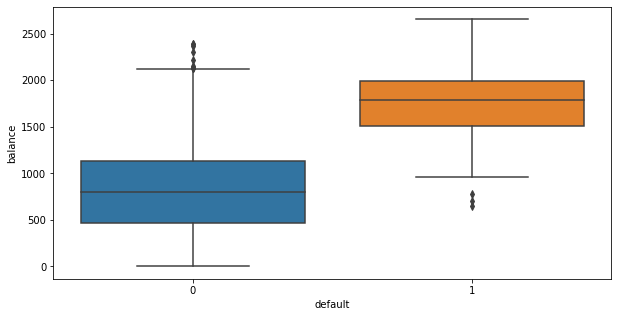

In [100]:
plt.figure(figsize=(10,5))
sns.boxplot(x=Default['default'],y=Default['balance'])
plt.show()

This shows that Balance is quite possibly a significant discriminating parameter for default

# Start of Credit Risk Modelling PD video (Part-3)

#### Descriptive statistics of Target variable

In [101]:
Default["default"].value_counts()

0    9667
1     333
Name: default, dtype: int64

#### Checking if dataset is balanced

In [102]:
333/10000

0.0333

This suggests that there is a Class Imbalance Problem i.e. class distributions are highly imbalanced. 
In this context, many classification learning algorithms have low predictive accuracy for the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. 

The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. 
This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or ***SMOTE***.

##### Before we do SMOTE, lets transform & perform dummy variable creation

#### Creating dummy variables

In [103]:
default_dummy = pd.get_dummies(Default,drop_first=True)
default_dummy.head()

,default,balance,income,student_Yes
0,0,729.53,44361.63,0
1,0,817.18,12106.13,1
2,0,1073.55,31767.14,0
3,0,529.25,35704.49,0
4,0,785.66,38463.50,0


##### Creating X & Y variables separately for models

In [104]:
X=default_dummy.drop(['default'],axis=1)
y=default_dummy['default']

##### Printing counts of abels 1 & 0 Before oversampling

In [105]:
print('Before OverSampling, the shape of X: {}'.format(X.shape)) 
print('Before OverSampling, the shape of y: {} \n'.format(y.shape)) 
  
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before OverSampling, counts of label '0': {}".format(sum(y == 0)))

Before OverSampling, the shape of X: (10000, 3)
Before OverSampling, the shape of y: (10000,) 

Before OverSampling, counts of label '1': 333
Before OverSampling, counts of label '0': 9667


#### Balancing the dataset

In [106]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33)
X_res, y_res = sm.fit_sample(X, y.ravel())

##### Printing counts of labels 1 & 0 After oversampling

In [107]:
print('After OverSampling, the shape of X: {}'.format(X_res.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

After OverSampling, the shape of X: (19334, 3)
After OverSampling, the shape of y: (19334,) 

After OverSampling, counts of label '1': 9667
After OverSampling, counts of label '0': 9667


#### Checking proportion of default after applying smote

In [108]:
9667/(9667+9667)

0.5

#### Merging back X & Y in one dataframe

In [109]:
X_res=pd.DataFrame(X_res)

#Renaming column name of Target variable
y_res=pd.DataFrame(y_res)
y_res.columns = ['default']

default_smote = pd.concat([X_res,y_res], axis=1)

In [110]:
default_smote.head()

,balance,income,student_Yes,default
0,729.53,44361.63,0,0
1,817.18,12106.13,1,0
2,1073.55,31767.14,0,0
3,529.25,35704.49,0,0
4,785.66,38463.50,0,0


## Calculating group means to check average behavioral difference within each parameter for default_smote

In [111]:
class_feature_means = pd.DataFrame(columns=set(default_smote.default))

for c , rows in default_smote.groupby('default'):
    class_feature_means[c] = rows.mean()
    
class_feature_means

,0,1
balance,803.943747,1752.902330
income,33566.166610,31915.751218
student_Yes,0.291404,0.331127
default,0.000000,1.000000


- For people who **have not** defaulted, proportion of students is about 29%, avg balance is about 803 & avg income is about 33566
- For those who **have** defaulted, proportion of students is about 33%, avg balance is about 1752 which is ***twice*** as much & avg income is about 31915

## Logistic regression on 'default_smote' dataset

In [112]:
model = SM.logit(formula = 'default ~ balance + income + student_Yes', data=default_smote).fit()

Optimization terminated successfully.
         Current function value: 0.242759
         Iterations 8


#### Checking the coefficients

In [113]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                19334
Model:                          Logit   Df Residuals:                    19330
Method:                           MLE   Df Model:                            3
Date:                Wed, 15 Jul 2020   Pseudo R-squ.:                  0.6498
Time:                        11:36:34   Log-Likelihood:                -4693.5
converged:                       True   LL-Null:                       -13401.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -8.7336      0.188    -46.468      0.000      -9.102      -8.365
balance         0.0070      0.000     66.639      0.000       0.007       0.007
income      -1.025e-05   3.06e-06     -3.353      0.001   -1.62e-05   -4.26e-06
student_Yes    -1.3587      0.090    -15.126      0.000      -1.535      -1.183
===============================================================================
"""

The logit (or the log odds) function equation that we get from the above Logistic Regression is

z_1 = -8.7336 + (0.007)*balance + (-1.025e-05) *income + (-1.3587) *student_Yes

Here, z_1 denotes the logit function.

In [114]:
coefficients = model.params
coefficients

Intercept     -8.733604
balance        0.006982
income        -0.000010
student_Yes   -1.358733
dtype: float64

#### Checking ODDs ratio confidence interval

In [115]:
conf2 = model.conf_int()
print("odds ratio with confidence intervals")
print(np.exp(conf2))

odds ratio with confidence intervals
                    0         1
Intercept    0.000111  0.000233
balance      1.006800  1.007214
income       0.999984  0.999996
student_Yes  0.215500  0.306459


## LDA on 'default_smote' dataset

#### Creating LDA model

In [116]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clfLDA = LinearDiscriminantAnalysis()

#### Fitting the model

In [117]:
clfLDA.fit(X_res, y_res.values.ravel())

LinearDiscriminantAnalysis()

#### Calculating parameter coefficients

In [118]:
clfLDA.coef_

array([[ 6.87406634e-03, -1.39113578e-05, -1.44507319e+00]])

#### Calculating intercept parameter

In [119]:
clfLDA.intercept_

array([-7.88269269])

#### Prior probabilities of default group

In [120]:
9667/(9667+9667)

0.5

#### Predicting on actual dataset

In [121]:
y_pred=clfLDA.predict(X_res)

#### Calculating confusion matrix

Confusion matrix terminologies:

- Sensitivity aka Recall (true positives / all actual positives) = TP / TP + FN
- Specificity (true negatives / all actual negatives) =TN / TN + FP
- Accuracy (all correct / all) = TP + TN / TP + TN + FP + FN
- Misclassification (all incorrect / all) = FP + FN / TP + TN + FP + FN

In [122]:
print(metrics.confusion_matrix(y_res, y_pred))

[[8174 1493]
 [ 492 9175]]


#### Checking the sensitivity of the model

In [123]:
9175/(9175+492)

0.9491052032688528

95% of those defaulted were correctly identified as defaulters by the model

#### Checking the specificity of the model

In [124]:
8174/(8174+1493)

0.8455570497569049

85% of those not defaulted were correctly identified as non-defaulters by the model

#### Checking model efficiency

In [125]:
(8174+9175)/(8174+9175+1493+492)

0.8973311265128788

Overall 90% of correct predictions to total predictions were made by the model

#### Checking misclassiffication rate

In [126]:
1-((8174+9175)/(8174+9175+1493+492))

0.10266887348712117

## Decision Tree on 'default_smote' dataset

In [127]:
from sklearn import tree 
import matplotlib.pyplot as plt

#### Create Decision Tree Classifier

In [128]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)

Here, we have taken maximum depth of the tree as 2.
We may try different depths & decide till what nodes to expand i.e. until all leaves are pure (if max_depth=None) or until nodes are less than max_depth specified.

#### Fitting Decision Tree model

In [129]:
clf.fit(X_res, y_res)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [130]:
clf.feature_importances_

array([1., 0., 0.])

#### Visualising Dtree

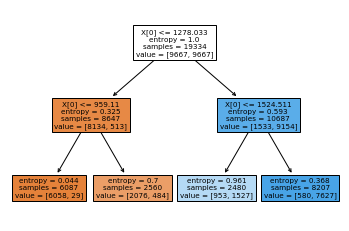

In [131]:
tree.plot_tree(clf.fit(X_res, y_res),filled=True) 
plt.show()

Balance has turned out to be most significant parameter in predicting default

#### Predicting on Actual dataset

In [132]:
y_predict = clf.predict(X_res)

#### Calculating confusion matrix

In [133]:
print(metrics.confusion_matrix(y_res, y_predict))

[[8134 1533]
 [ 513 9154]]


#### Calculating sensitivity of the model

In [134]:
9154/(9154+513)

0.9469328643839867

95% of those defaulted were correctly identified as defaulters by the model

#### Calculating specificity of the model

In [135]:
8134/(8134+1533)

0.8414192614047792

84% of those not defaulted were correctly identified as non defaulters by the model

#### Calculating model efficiency

In [136]:
(9154+8134)/(9154+8134+1533+513)

0.894176062894383

Overall 89% of correct predictions to total predictions were made by the model

#### Checking misclassiffication rate

In [137]:
1-((9154+8134)/(9154+8134+1533+513))

0.105823937105617

## Random Forest (RF) on 'default_smote' dataset

In [138]:
from sklearn.ensemble import RandomForestClassifier

#### Creating RF Classifier 

In [139]:
clfRF=RandomForestClassifier(n_estimators=500,max_depth=3)

Here, we have taken maximum depth of the tree as 3.
We may try different depths & decide till what nodes to expand i.e. until all leaves are pure (if max_depth=None) or until nodes are less than max_depth specified.

#### Fitting the RF model

In [140]:
clfRF.fit(X_res, y_res)

RandomForestClassifier(max_depth=3, n_estimators=500)

#### Checking feature importances

In [141]:
 clfRF.feature_importances_

array([0.91970174, 0.07267891, 0.00761935])

Clearly balance turnsout to be the most significant discriminating parameter for default

#### Predicting on actual dataset

In [142]:
y_predict = clfRF.predict(X_res)
print(metrics.confusion_matrix(y_res, y_predict))

[[8402 1265]
 [ 631 9036]]


#### Calculating sensitivity of the model

In [143]:
9027/(9027+640)

0.9337953863659874

93% of those defaulted were correctly identified as defaulters by the model

#### Calculating specificity of the model

In [144]:
8404/(8404+1263)

0.8693493327816282

87% of those not defaulted were correctly identified as non defaulters by the model

#### Calculating model efficiency

In [145]:
(9027+8404)/(9027+8404+1263+640)

0.9015723595738078

Overall 90% of correct predictions to total predictions were made by the model

#### Checking misclassiffication rate

In [146]:
1-((9027+8404)/(9027+8404+1263+640))

0.09842764042619223

## END